Group33 Wrokbook
Group Member: Max Zhang, William Xu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
f1data=pd.read_csv("data/f1_race_results_2010_2023.csv")
f1data.head()

,season,round,race_name,circuit,date,driver_id,driver_number,driver_name,constructor,grid,position,position_text,status,laps,time,fastest_lap_rank,fastest_lap_time
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,alonso,8,Fernando Alonso,Ferrari,3,1,1,Finished,49,1:39:20.396,1.0,1:58.287
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,massa,7,Felipe Massa,Ferrari,2,2,2,Finished,49,+16.099,5.0,1:59.732
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,hamilton,2,Lewis Hamilton,McLaren,4,3,3,Finished,49,+23.182,4.0,1:59.560
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,vettel,5,Sebastian Vettel,Red Bull,1,4,4,Finished,49,+38.799,12.0,2:00.218
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,rosberg,4,Nico Rosberg,Mercedes,5,5,5,Finished,49,+40.213,13.0,2:00.236


In [3]:
f1data['time'].describe()

count        3022
unique       2997
top       +13.842
freq            2
Name: time, dtype: object

In [4]:
from datetime import datetime, timedelta

def process_time_row_by_row(df):
    def absolute_to_timedelta(time_str):
        if pd.isna(time_str) or not isinstance(time_str, str):
            return None
        parts = str(time_str).split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = float(parts[2])
        return timedelta(hours=hours, minutes=minutes, seconds=seconds)
    
    def relative_to_timedelta(time_str):
        time_str = time_str.replace('+', '').strip()
        parts = time_str.split(':')
        if len(parts) == 2:  
            minutes = int(parts[0])
            seconds = float(parts[1])
            return timedelta(minutes=minutes, seconds=seconds)
        else:  
            return timedelta(seconds=float(parts[0]))
    
    df = df.copy()
    
    df['race_time'] = pd.NaT
    
    for (season, round_num), group in df.groupby(['season', 'round']):
        prev_delta = None
        
        for idx in group.index:
            current_time = df.at[idx, 'time']
            
            if pd.isna(current_time):
                continue
            
            current_time = str(current_time)  
                
            if current_time.count(':') == 2:
                prev_delta = absolute_to_timedelta(current_time)
                df.at[idx, 'race_time'] = pd.Timestamp('2000-01-01') + prev_delta
                
            elif current_time.startswith('+'):
                if prev_delta is not None:
                    relative_delta = relative_to_timedelta(current_time)
                    new_delta = prev_delta + relative_delta
                    df.at[idx, 'race_time'] = pd.Timestamp('2000-01-01') + new_delta
                    prev_delta = new_delta
    
    df['race_time'] = df['race_time'].dt.time
    
    return df

f1data = process_time_row_by_row(f1data)

print("\nSample of processed times:")
print(f1data[['position', 'time', 'race_time']].head(10))
print("\nData type of race_time column:", f1data['race_time'].dtype)


Sample of processed times:
   position         time        race_time
0         1  1:39:20.396  01:39:20.396000
1         2      +16.099  01:39:36.495000
2         3      +23.182  01:39:59.677000
3         4      +38.799  01:40:38.476000
4         5      +40.213  01:41:18.689000
5         6      +44.163  01:42:02.852000
6         7      +45.280  01:42:48.132000
7         8      +46.360  01:43:34.492000
8         9      +53.008  01:44:27.500000
9        10    +1:02.489  01:45:29.989000

Data type of race_time column: object


In [5]:
f1_data=process_time_row_by_row(f1data)

In [6]:
f1_data.head()

,season,round,race_name,circuit,date,driver_id,driver_number,driver_name,constructor,grid,position,position_text,status,laps,time,fastest_lap_rank,fastest_lap_time,race_time
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,alonso,8,Fernando Alonso,Ferrari,3,1,1,Finished,49,1:39:20.396,1.0,1:58.287,01:39:20.396000
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,massa,7,Felipe Massa,Ferrari,2,2,2,Finished,49,+16.099,5.0,1:59.732,01:39:36.495000
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,hamilton,2,Lewis Hamilton,McLaren,4,3,3,Finished,49,+23.182,4.0,1:59.560,01:39:59.677000
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,vettel,5,Sebastian Vettel,Red Bull,1,4,4,Finished,49,+38.799,12.0,2:00.218,01:40:38.476000
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,rosberg,4,Nico Rosberg,Mercedes,5,5,5,Finished,49,+40.213,13.0,2:00.236,01:41:18.689000


In [7]:
# Convert race_time to seconds
def time_to_seconds(time_obj):
    if pd.isna(time_obj):
        return None
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1000000


f1_data['race_time_seconds'] = f1_data['race_time'].apply(time_to_seconds)


print(f1_data['race_time_seconds'].describe())
f1_data.head()


count     3002.000000
mean      6150.457944
std       1211.291994
min       4421.143000
25%       5510.408000
50%       5875.865000
75%       6348.133750
max      15039.381000
Name: race_time_seconds, dtype: float64


,season,round,race_name,circuit,date,driver_id,driver_number,driver_name,constructor,grid,position,position_text,status,laps,time,fastest_lap_rank,fastest_lap_time,race_time,race_time_seconds
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,alonso,8,Fernando Alonso,Ferrari,3,1,1,Finished,49,1:39:20.396,1.0,1:58.287,01:39:20.396000,5960.396
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,massa,7,Felipe Massa,Ferrari,2,2,2,Finished,49,+16.099,5.0,1:59.732,01:39:36.495000,5976.495
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,hamilton,2,Lewis Hamilton,McLaren,4,3,3,Finished,49,+23.182,4.0,1:59.560,01:39:59.677000,5999.677
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,vettel,5,Sebastian Vettel,Red Bull,1,4,4,Finished,49,+38.799,12.0,2:00.218,01:40:38.476000,6038.476
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,rosberg,4,Nico Rosberg,Mercedes,5,5,5,Finished,49,+40.213,13.0,2:00.236,01:41:18.689000,6078.689


In [8]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit and transform the driver_id column
f1_data['driver_encoded'] = label_encoder.fit_transform(f1_data['driver_id'])


In [9]:
f1_data.head()

,season,round,race_name,circuit,date,driver_id,driver_number,driver_name,constructor,grid,position,position_text,status,laps,time,fastest_lap_rank,fastest_lap_time,race_time,race_time_seconds,driver_encoded
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,alonso,8,Fernando Alonso,Ferrari,3,1,1,Finished,49,1:39:20.396,1.0,1:58.287,01:39:20.396000,5960.396,3
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,massa,7,Felipe Massa,Ferrari,2,2,2,Finished,49,+16.099,5.0,1:59.732,01:39:36.495000,5976.495,41
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,hamilton,2,Lewis Hamilton,McLaren,4,3,3,Finished,49,+23.182,4.0,1:59.560,01:39:59.677000,5999.677,22
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,vettel,5,Sebastian Vettel,Red Bull,1,4,4,Finished,49,+38.799,12.0,2:00.218,01:40:38.476000,6038.476,72
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,rosberg,4,Nico Rosberg,Mercedes,5,5,5,Finished,49,+40.213,13.0,2:00.236,01:41:18.689000,6078.689,59


In [10]:
print("Driver ID to Integer Mapping:")
for i, driver in enumerate(label_encoder.classes_):
    print(f"{driver}: {i}")




Driver ID to Integer Mapping:
aitken: 0
albon: 1
alguersuari: 2
alonso: 3
ambrosio: 4
barrichello: 5
bottas: 6
brendon_hartley: 7
bruno_senna: 8
buemi: 9
button: 10
chandhok: 11
chilton: 12
de_vries: 13
ericsson: 14
garde: 15
gasly: 16
giovinazzi: 17
glock: 18
grassi: 19
grosjean: 20
gutierrez: 21
hamilton: 22
haryanto: 23
heidfeld: 24
hulkenberg: 25
jolyon_palmer: 26
jules_bianchi: 27
karthikeyan: 28
kevin_magnussen: 29
klien: 30
kobayashi: 31
kovalainen: 32
kubica: 33
kvyat: 34
latifi: 35
lawson: 36
leclerc: 37
liuzzi: 38
lotterer: 39
maldonado: 40
massa: 41
max_verstappen: 42
mazepin: 43
merhi: 44
michael_schumacher: 45
mick_schumacher: 46
nasr: 47
norris: 48
ocon: 49
perez: 50
petrov: 51
piastri: 52
pic: 53
pietro_fittipaldi: 54
raikkonen: 55
resta: 56
ricciardo: 57
rosa: 58
rosberg: 59
rossi: 60
russell: 61
sainz: 62
sargeant: 63
sirotkin: 64
stevens: 65
stroll: 66
sutil: 67
trulli: 68
tsunoda: 69
vandoorne: 70
vergne: 71
vettel: 72
webber: 73
wehrlein: 74
yamamoto: 75
zhou: 76


In [11]:
f1_data.head()

,season,round,race_name,circuit,date,driver_id,driver_number,driver_name,constructor,grid,position,position_text,status,laps,time,fastest_lap_rank,fastest_lap_time,race_time,race_time_seconds,driver_encoded
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,alonso,8,Fernando Alonso,Ferrari,3,1,1,Finished,49,1:39:20.396,1.0,1:58.287,01:39:20.396000,5960.396,3
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,massa,7,Felipe Massa,Ferrari,2,2,2,Finished,49,+16.099,5.0,1:59.732,01:39:36.495000,5976.495,41
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,hamilton,2,Lewis Hamilton,McLaren,4,3,3,Finished,49,+23.182,4.0,1:59.560,01:39:59.677000,5999.677,22
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,vettel,5,Sebastian Vettel,Red Bull,1,4,4,Finished,49,+38.799,12.0,2:00.218,01:40:38.476000,6038.476,72
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,rosberg,4,Nico Rosberg,Mercedes,5,5,5,Finished,49,+40.213,13.0,2:00.236,01:41:18.689000,6078.689,59


In [12]:
# Encode circuits and constructors
from sklearn.preprocessing import LabelEncoder

circuit_encoder = LabelEncoder()
constructor_encoder = LabelEncoder()
f1_data['circuit_encoded'] = circuit_encoder.fit_transform(f1_data['circuit'])
f1_data['constructor_encoded'] = constructor_encoder.fit_transform(f1_data['constructor'])


print("Circuit ID to Integer Mapping:")
for i, circuit in enumerate(circuit_encoder.classes_):
    print(f"{circuit}: {i}")

print("\nConstructor ID to Integer Mapping:")
for i, constructor in enumerate(constructor_encoder.classes_):
    print(f"{constructor}: {i}")

f1_data.head()


Circuit ID to Integer Mapping:
Albert Park Grand Prix Circuit: 0
Autodromo Enzo e Dino Ferrari: 1
Autodromo Internazionale del Mugello: 2
Autodromo Nazionale di Monza: 3
Autódromo Hermanos Rodríguez: 4
Autódromo Internacional do Algarve: 5
Autódromo José Carlos Pace: 6
Bahrain International Circuit: 7
Baku City Circuit: 8
Buddh International Circuit: 9
Circuit Gilles Villeneuve: 10
Circuit Park Zandvoort: 11
Circuit Paul Ricard: 12
Circuit de Barcelona-Catalunya: 13
Circuit de Monaco: 14
Circuit de Spa-Francorchamps: 15
Circuit of the Americas: 16
Hockenheimring: 17
Hungaroring: 18
Istanbul Park: 19
Jeddah Corniche Circuit: 20
Korean International Circuit: 21
Las Vegas Strip Street Circuit: 22
Losail International Circuit: 23
Marina Bay Street Circuit: 24
Miami International Autodrome: 25
Nürburgring: 26
Red Bull Ring: 27
Sepang International Circuit: 28
Shanghai International Circuit: 29
Silverstone Circuit: 30
Sochi Autodrom: 31
Suzuka Circuit: 32
Valencia Street Circuit: 33
Yas Mari

,season,round,race_name,circuit,date,driver_id,driver_number,driver_name,constructor,grid,...,status,laps,time,fastest_lap_rank,fastest_lap_time,race_time,race_time_seconds,driver_encoded,circuit_encoded,constructor_encoded
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,alonso,8,Fernando Alonso,Ferrari,3,...,Finished,49,1:39:20.396,1.0,1:58.287,01:39:20.396000,5960.396,3,7,5
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,massa,7,Felipe Massa,Ferrari,2,...,Finished,49,+16.099,5.0,1:59.732,01:39:36.495000,5976.495,41,7,5
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,hamilton,2,Lewis Hamilton,McLaren,4,...,Finished,49,+23.182,4.0,1:59.560,01:39:59.677000,5999.677,22,7,13
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,vettel,5,Sebastian Vettel,Red Bull,1,...,Finished,49,+38.799,12.0,2:00.218,01:40:38.476000,6038.476,72,7,16
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,rosberg,4,Nico Rosberg,Mercedes,5,...,Finished,49,+40.213,13.0,2:00.236,01:41:18.689000,6078.689,59,7,14


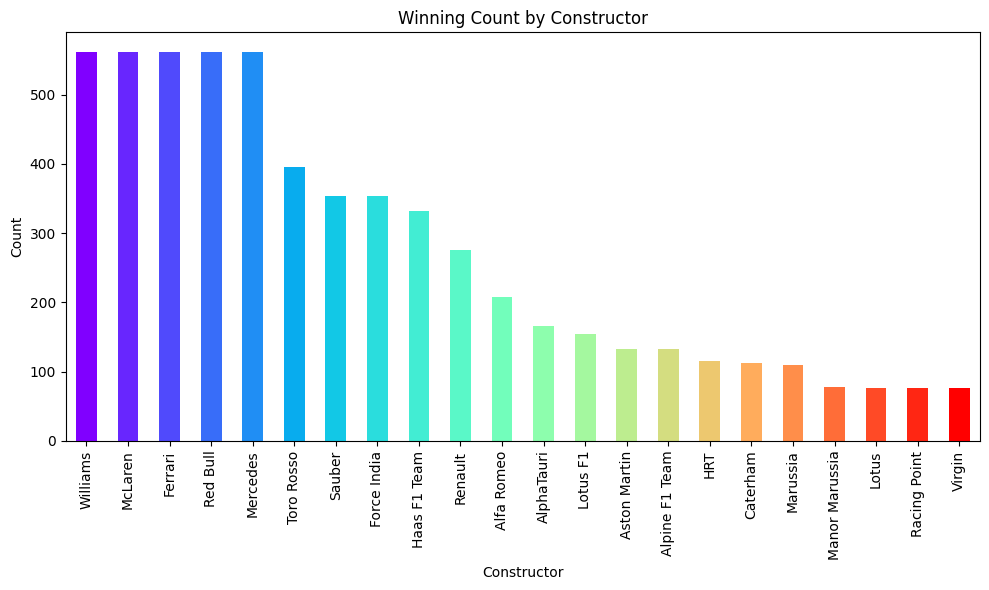

In [13]:
wining_count=f1_data.groupby('constructor').size().sort_values(ascending=False)


num_constructors = len(wining_count)
colors = plt.cm.rainbow(np.linspace(0, 1, num_constructors))
plt.figure(figsize=(10, 6))
wining_count.plot(kind='bar', color=colors)
plt.title('Winning Count by Constructor')
plt.xlabel('Constructor')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Best Driver for Each Circuit (by number of wins):
                                  circuit       driver_name  wins
126                   Silverstone Circuit    Lewis Hamilton     7
85                            Hungaroring    Lewis Hamilton     6
53         Circuit de Barcelona-Catalunya    Lewis Hamilton     6
46              Circuit Gilles Villeneuve    Lewis Hamilton     6
143                    Yas Marina Circuit    Lewis Hamilton     5
104             Marina Bay Street Circuit  Sebastian Vettel     5
111                         Red Bull Ring    Max Verstappen     5
122        Shanghai International Circuit    Lewis Hamilton     5
32          Bahrain International Circuit    Lewis Hamilton     5
131                        Sochi Autodrom    Lewis Hamilton     5
20           Autódromo Hermanos Rodríguez    Max Verstappen     5
14           Autodromo Nazionale di Monza    Lewis Hamilton     5
74                Circuit of the Americas    Lewis Hamilton     5
118          Sepang Intern

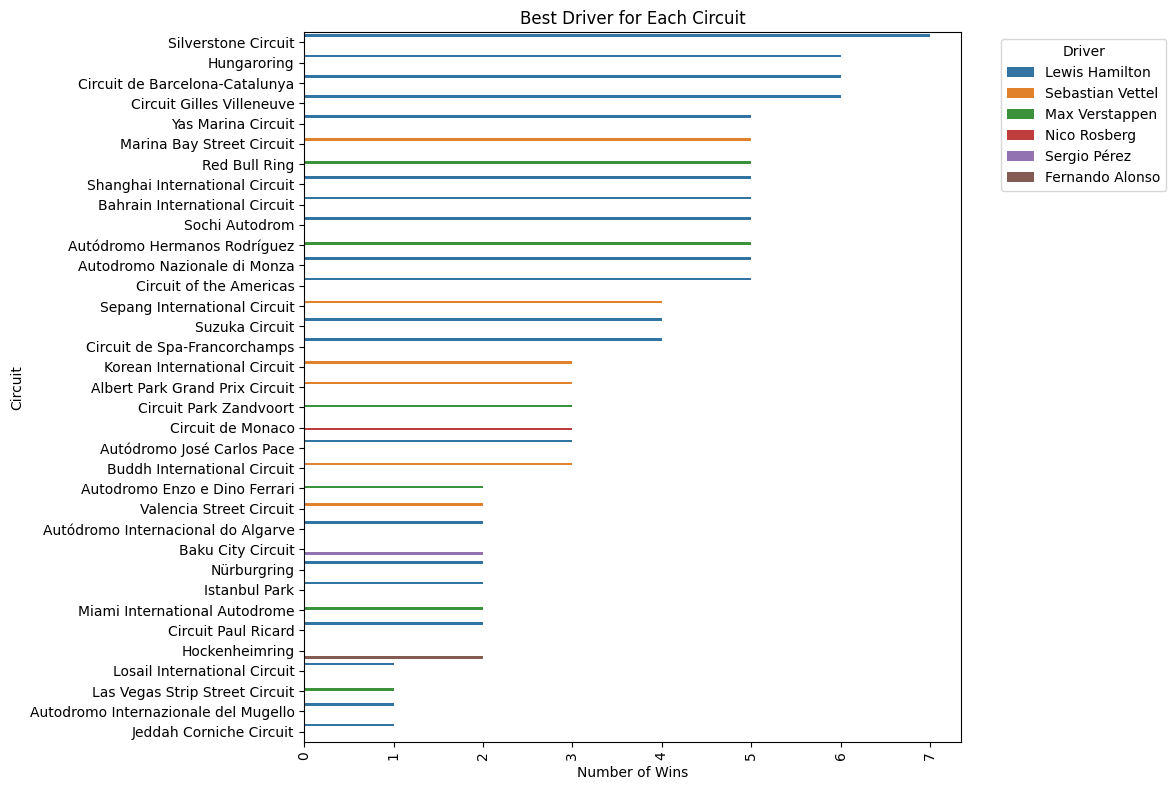

In [14]:
# Find the best driver for each circuit based on how many 1st positions won
best_drivers = f1_data[f1_data['position'] == 1].groupby(['circuit', 'driver_name']).size().reset_index()
best_drivers.columns = ['circuit', 'driver_name', 'wins']

# Get the driver with the most wins for each circuit
best_drivers_per_circuit = best_drivers.loc[best_drivers.groupby('circuit')['wins'].idxmax()]

# Sort by number of wins in descending order
best_drivers_per_circuit = best_drivers_per_circuit.sort_values('wins', ascending=False)

print("Best Driver for Each Circuit (by number of wins):")
print(best_drivers_per_circuit)

# Visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(x='wins', y='circuit', hue='driver_name', data=best_drivers_per_circuit)
plt.title('Best Driver for Each Circuit')
plt.xlabel('Number of Wins')
plt.ylabel('Circuit')
plt.xticks(rotation=90)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [15]:
f1_data.head()

,season,round,race_name,circuit,date,driver_id,driver_number,driver_name,constructor,grid,...,status,laps,time,fastest_lap_rank,fastest_lap_time,race_time,race_time_seconds,driver_encoded,circuit_encoded,constructor_encoded
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,alonso,8,Fernando Alonso,Ferrari,3,...,Finished,49,1:39:20.396,1.0,1:58.287,01:39:20.396000,5960.396,3,7,5
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,massa,7,Felipe Massa,Ferrari,2,...,Finished,49,+16.099,5.0,1:59.732,01:39:36.495000,5976.495,41,7,5
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,hamilton,2,Lewis Hamilton,McLaren,4,...,Finished,49,+23.182,4.0,1:59.560,01:39:59.677000,5999.677,22,7,13
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,vettel,5,Sebastian Vettel,Red Bull,1,...,Finished,49,+38.799,12.0,2:00.218,01:40:38.476000,6038.476,72,7,16
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,rosberg,4,Nico Rosberg,Mercedes,5,...,Finished,49,+40.213,13.0,2:00.236,01:41:18.689000,6078.689,59,7,14


Average Lap Time by Season (in seconds):
    season  avg_lap_time
0     2010    107.911404
1     2011    111.893346
2     2012    107.262437
3     2013    105.497551
4     2014    108.513419
5     2015    102.260104
6     2016    109.650884
7     2017    101.510471
8     2018     98.099123
9     2019     97.269137
10    2020    104.746143
11    2021    106.889452
12    2022    123.216343
13    2023    104.106914


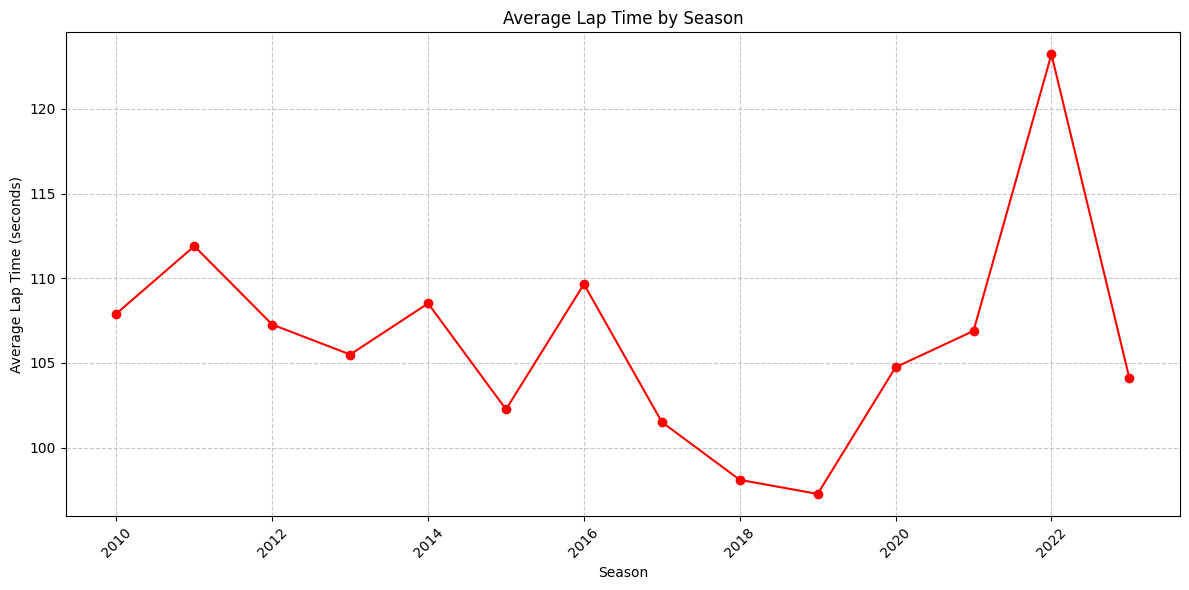

In [16]:

f1_data['avg_lap_time'] = f1_data['race_time_seconds'] / f1_data['laps']

# Group by season and calculate the mean of average lap times
season_avg_lap_time = f1_data.groupby('season')['avg_lap_time'].mean().reset_index()

# Sort by season for better visualization
season_avg_lap_time = season_avg_lap_time.sort_values(by='season')

# Display the results
print("Average Lap Time by Season (in seconds):")
print(season_avg_lap_time)


plt.figure(figsize=(12, 6))
plt.plot(season_avg_lap_time['season'], season_avg_lap_time['avg_lap_time'], marker='o', linestyle='-',color='red')
plt.title('Average Lap Time by Season')
plt.xlabel('Season')
plt.ylabel('Average Lap Time (seconds)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
f1_data.head()
# Convert fastest_lap_time to seconds
def convert_lap_time_to_seconds(lap_time):
    if pd.isna(lap_time) or lap_time == '\\N':
        return None
    
    # Check if the time is already in seconds format
    if isinstance(lap_time, (int, float)):
        return lap_time
    
    try:
        # Format is typically "m:ss.SSS"
        parts = lap_time.split(':')
        if len(parts) == 2:
            minutes = int(parts[0])
            seconds_parts = parts[1].split('.')
            seconds = int(seconds_parts[0])
            milliseconds = int(seconds_parts[1]) if len(seconds_parts) > 1 else 0
            return minutes * 60 + seconds + milliseconds / 1000
        else:
            # Handle other formats if needed
            return None
    except:
        return None

# Apply the conversion function to fastest_lap_time column
f1_data['fastest_lap_time_seconds'] = f1_data['fastest_lap_time'].apply(convert_lap_time_to_seconds)

# Display the first few rows to verify the conversion
print("Fastest lap times converted to seconds:")
print(f1_data[['fastest_lap_time', 'fastest_lap_time_seconds']].head())


Fastest lap times converted to seconds:
  fastest_lap_time  fastest_lap_time_seconds
0         1:58.287                   118.287
1         1:59.732                   119.732
2         1:59.560                   119.560
3         2:00.218                   120.218
4         2:00.236                   120.236


In [18]:

f1_data['faster_difference']=f1_data['avg_lap_time']-f1_data['fastest_lap_time_seconds']
f1_data.head()


,season,round,race_name,circuit,date,driver_id,driver_number,driver_name,constructor,grid,...,fastest_lap_rank,fastest_lap_time,race_time,race_time_seconds,driver_encoded,circuit_encoded,constructor_encoded,avg_lap_time,fastest_lap_time_seconds,faster_difference
0,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,alonso,8,Fernando Alonso,Ferrari,3,...,1.0,1:58.287,01:39:20.396000,5960.396,3,7,5,121.640735,118.287,3.353735
1,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,massa,7,Felipe Massa,Ferrari,2,...,5.0,1:59.732,01:39:36.495000,5976.495,41,7,5,121.969286,119.732,2.237286
2,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,hamilton,2,Lewis Hamilton,McLaren,4,...,4.0,1:59.560,01:39:59.677000,5999.677,22,7,13,122.442388,119.560,2.882388
3,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,vettel,5,Sebastian Vettel,Red Bull,1,...,12.0,2:00.218,01:40:38.476000,6038.476,72,7,16,123.234204,120.218,3.016204
4,2010,1,Bahrain Grand Prix,Bahrain International Circuit,2010-03-14,rosberg,4,Nico Rosberg,Mercedes,5,...,13.0,2:00.236,01:41:18.689000,6078.689,59,7,14,124.054878,120.236,3.818878


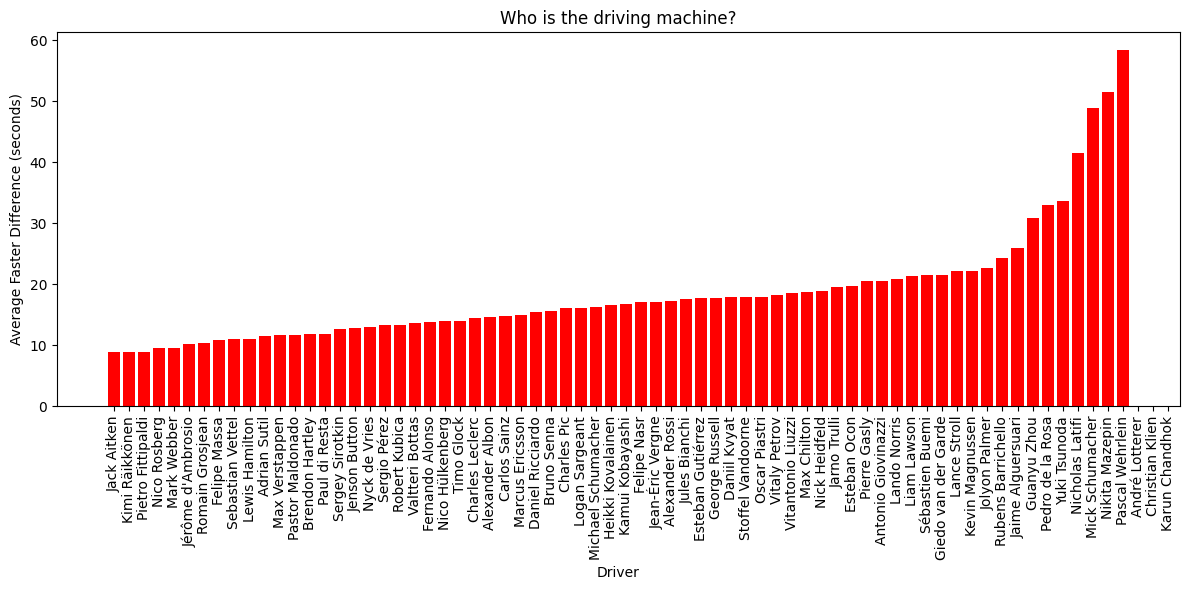

In [19]:
driver_avg_faster_difference = f1_data.groupby('driver_name')['faster_difference'].mean().sort_values(ascending=True)

# Sort the results in descending order to see which drivers have the largest difference
driver_avg_faster_difference.sort_values(ascending=True)
driver_avg_faster_difference.to_frame()


driver_avg_faster_difference.head(10)
plt.figure(figsize=(12, 6))
plt.bar(driver_avg_faster_difference.index, driver_avg_faster_difference.values, color='red')
plt.title('Who is the driving machine?')
plt.xlabel('Driver')
plt.ylabel('Average Faster Difference (seconds)')
plt.xticks(rotation=90)
plt.tight_layout()

Best Constructor Each Season:
     season constructor  fastest_lap_time_seconds
0      2010     Ferrari                 93.496946
18     2011    Red Bull                 92.878270
30     2012     McLaren                 93.796053
43     2013    Red Bull                 93.461921
48     2014     Ferrari                 94.286722
63     2015    Mercedes                 92.800816
73     2016    Mercedes                 92.460700
83     2017    Mercedes                 89.384500
94     2018    Red Bull                 88.316325
103    2019    Mercedes                 87.705929
114    2020    Mercedes                 84.185471
127    2021    Red Bull                 84.547375
136    2022    Mercedes                 88.375357
147    2023    Red Bull                 87.270000


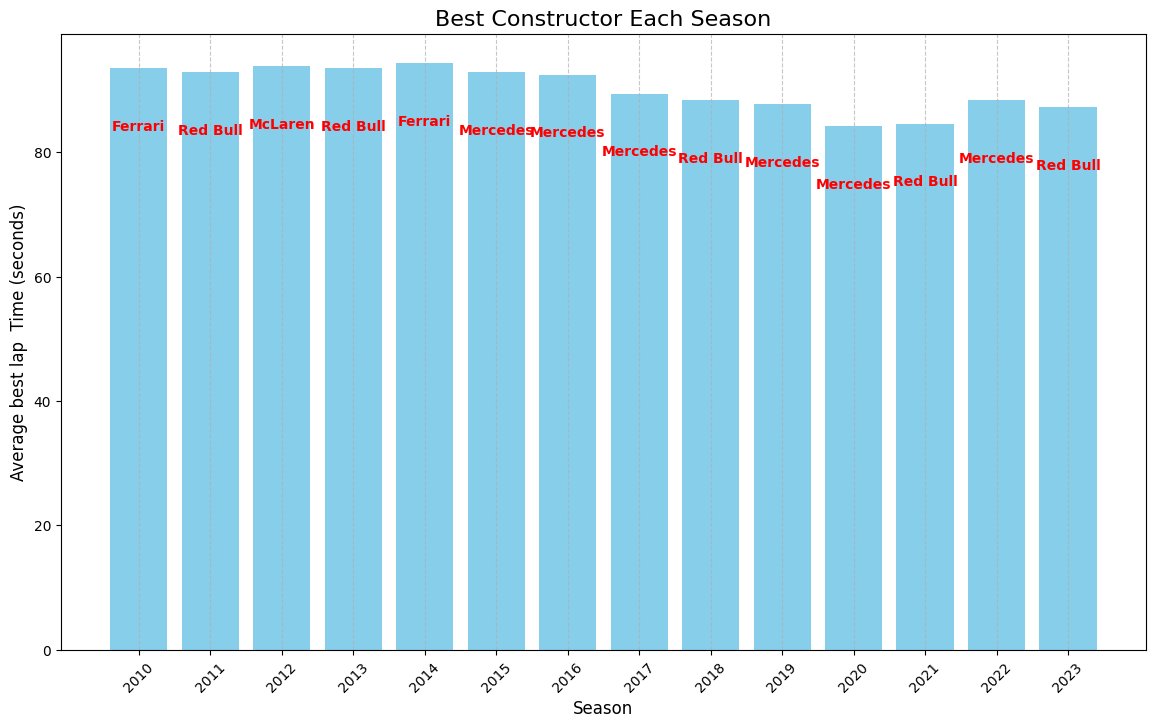

In [20]:
# Group data by season and constructor, then calculate the average race time for each constructor in each season
constructor_season_performance = f1_data.groupby(['season', 'constructor'])['fastest_lap_time_seconds'].mean().reset_index()

fastest_constructors = constructor_season_performance.loc[
    constructor_season_performance.groupby('season')['fastest_lap_time_seconds'].idxmin()
]

plt.figure(figsize=(14, 8))
seasons = fastest_constructors['season'].astype(str)
constructors = fastest_constructors['constructor']
race_times = fastest_constructors['fastest_lap_time_seconds']

bars = plt.bar(seasons, race_times, color='skyblue')

for i, (constructor, time) in enumerate(zip(constructors, race_times)):
    plt.text(i, time-10, constructor, ha='center', rotation=0, 
             fontweight='bold', color='red', fontsize=10)

plt.title('Best Constructor Each Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average best lap  Time (seconds)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)


print("Best Constructor Each Season:")
print(fastest_constructors[['season', 'constructor', 'fastest_lap_time_seconds']].sort_values('season'))


In [21]:
f1_data.to_csv("data/f1_data_cleaned.csv", index=False)